In [1]:
# USO DE IMAGENES SINTÉTICAS

# CLONAR PROYECTO, INCLUYE IMAGENES DE FONDO (TEST02 SIN PELOTA Y COCO COMPRIMIDO)
!git clone https://github.com/mottasilvia/UCU-DeepLearning-Project

Cloning into 'UCU-DeepLearning-Project'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (174/174), done.
remote: Total 178 (delta 31), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (178/178), 186.23 MiB | 25.90 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [2]:
!pip install roboflow
!pip install ultralytics==8.0.196

from roboflow import Roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 6.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_c

In [3]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [4]:
import os

# DIRECTORIOS DE TRABAJO

synthetic_images_dir = "UCU-DeepLearning-Project/synthetic_images/"
coco_dir = synthetic_images_dir + "background_coco/"
solo_pelota_dir = synthetic_images_dir + "background_test02_sin_pelota/"
solo_pelota_augented_dir = synthetic_images_dir + "background_test02_sin_pelota_augmented/"

overlay_images_v1_dir = synthetic_images_dir + "overlay_images_v1/"
overlay_images_v2_dir = synthetic_images_dir + "overlay_images_v2/"
test02_dir = "/content/datasets/test02/"
training_datasets_dir = "/content/datasets/trainings_datasets/"
training_results_dir = synthetic_images_dir + "trainings_results/"

os.makedirs(training_results_dir, exist_ok=True)
os.makedirs(training_datasets_dir, exist_ok=True)

os.makedirs(solo_pelota_augented_dir, exist_ok=True)

In [5]:
# IMPORTACION DE FUNCIONES
import sys
sys.path.insert(0,synthetic_images_dir)

import functions_annotations
import functions_training
import functions_images
import image_video_loader

In [6]:
# IMPORTACIÓN DE DATASET PARA VALIDACIÓN

rf = Roboflow(api_key="qoRuT4r6jXcLdFGD8Dc6")
project2 = rf.workspace("maestria").project("test02-ta9qb")
version2 = project2.version(3)
dataset2 = version2.download("yolov8", location=test02_dir)


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/test02/ in yolov8:: 100%|██████████| 4546/4546 [00:01<00:00, 2746.24it/s]


In [7]:
# DESCOMPRIMIR 1000 IMAGENES DE COCO

import zipfile

def unzip_to_folder(zip_files, target_dir="unzipped_files"):
  os.makedirs(target_dir, exist_ok=True)

  for zip_file in zip_files:
    filename, _ = os.path.splitext(os.path.basename(zip_file))
    folder_name = target_dir
    os.makedirs(folder_name, exist_ok=True)

    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
      zip_ref.extractall(folder_name)

if __name__ == "__main__":
  # Example usage
  zip_files = ["UCU-DeepLearning-Project/synthetic_images/background_coco_01.zip", "UCU-DeepLearning-Project/synthetic_images/background_coco_02.zip", "UCU-DeepLearning-Project/synthetic_images/background_coco_03.zip"]
  unzip_to_folder(zip_files, coco_dir)


In [8]:
# AUGMENTATION DE IMAGENES DE FONDO DE CANCHA SIN PELOTA

functions_images.augment(solo_pelota_dir, solo_pelota_augented_dir, copy_original=True, modifications_number=5, crops_number=5,
                         h_flip_probability=0.5, v_flip_probability=0, resize=(0.8, 1.2), rotation=(-10, 10),
                         blur_range=(0, 7), brightness_range=(0.8, 1.2), contrast_range=(0.9, 1.1),
                         saturation_range=(0.9, 1.1), gray_threshold_range=(0.0, 0.0), origin_labels_folder=None,
                         target_labels_folder=None, crops_min_width=800, crops_max_width=1000)


100%|██████████| 88/88 [00:54<00:00,  1.62it/s]


2024-06-20 11:52:59.903055 COCO_v1_1_pelota


UCU-DeepLearning-Project/synthetic_images/overlay_images_v1/: 100%|██████████| 300/300 [00:01<00:00, 150.89it/s]
val: 100%|██████████| 30/30 [00:00<00:00, 8423.99it/s]
100%|██████████| 21.5M/21.5M [00:00<00:00, 231MB/s]
New https://pypi.org/project/ultralytics/8.2.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=../../Yolo-Weights/yolov8s.pt, data=/content/datasets/trainings_datasets/COCO_v1_1_pelota/training/data.yaml, epochs=2, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=COCO_v1_1_pelota, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save

Result
FP    17419
FN      151
Name: count, dtype: int64
2024-06-20 11:57:34.925516 COCO_v1_5_pelotas


UCU-DeepLearning-Project/synthetic_images/overlay_images_v1/: 100%|██████████| 300/300 [00:03<00:00, 88.37it/s] 
val: 100%|██████████| 30/30 [00:00<00:00, 9285.60it/s]
New https://pypi.org/project/ultralytics/8.2.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=../../Yolo-Weights/yolov8s.pt, data=/content/datasets/trainings_datasets/COCO_v1_5_pelotas/training/data.yaml, epochs=2, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=COCO_v1_5_pelotas, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7

Result
FP    12558
FN      151
Name: count, dtype: int64
2024-06-20 12:00:47.643897 COCO_v2_1_pelota


UCU-DeepLearning-Project/synthetic_images/overlay_images_v2/: 100%|██████████| 300/300 [00:02<00:00, 146.74it/s]
val: 100%|██████████| 30/30 [00:00<00:00, 11556.68it/s]
New https://pypi.org/project/ultralytics/8.2.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=../../Yolo-Weights/yolov8s.pt, data=/content/datasets/trainings_datasets/COCO_v2_1_pelota/training/data.yaml, epochs=2, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=COCO_v2_1_pelota, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7,

Result
FP    15499
FN      151
Name: count, dtype: int64
2024-06-20 12:04:46.673320 COCO_v2_5_pelotas


UCU-DeepLearning-Project/synthetic_images/overlay_images_v2/: 100%|██████████| 300/300 [00:03<00:00, 77.67it/s]
val: 100%|██████████| 30/30 [00:00<00:00, 10870.77it/s]
New https://pypi.org/project/ultralytics/8.2.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=../../Yolo-Weights/yolov8s.pt, data=/content/datasets/trainings_datasets/COCO_v2_5_pelotas/training/data.yaml, epochs=2, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=COCO_v2_5_pelotas, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7

Result
FP    17222
FN      151
Name: count, dtype: int64
2024-06-20 12:08:56.508291 CANCHA_v1_1_pelota


UCU-DeepLearning-Project/synthetic_images/overlay_images_v1/: 100%|██████████| 968/968 [00:15<00:00, 61.72it/s]
val: 100%|██████████| 98/98 [00:00<00:00, 11191.21it/s]
New https://pypi.org/project/ultralytics/8.2.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=../../Yolo-Weights/yolov8s.pt, data=/content/datasets/trainings_datasets/CANCHA_v1_1_pelota/training/data.yaml, epochs=2, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=CANCHA_v1_1_pelota, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0

Result
FP    164
FN    150
TP      1
Name: count, dtype: int64
2024-06-20 12:10:51.256310 CANCHA_v1_5_pelotas


UCU-DeepLearning-Project/synthetic_images/overlay_images_v1/: 100%|██████████| 968/968 [00:17<00:00, 54.76it/s]
val: 100%|██████████| 97/97 [00:00<00:00, 8469.28it/s]
New https://pypi.org/project/ultralytics/8.2.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=../../Yolo-Weights/yolov8s.pt, data=/content/datasets/trainings_datasets/CANCHA_v1_5_pelotas/training/data.yaml, epochs=2, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=CANCHA_v1_5_pelotas, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=

Result
FP    142
FN     93
TP     58
Name: count, dtype: int64
2024-06-20 12:12:53.086898 CANCHA_v2_1_pelota


UCU-DeepLearning-Project/synthetic_images/overlay_images_v2/: 100%|██████████| 968/968 [00:14<00:00, 65.75it/s]
val: 100%|██████████| 98/98 [00:00<00:00, 12319.55it/s]
New https://pypi.org/project/ultralytics/8.2.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=../../Yolo-Weights/yolov8s.pt, data=/content/datasets/trainings_datasets/CANCHA_v2_1_pelota/training/data.yaml, epochs=2, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=CANCHA_v2_1_pelota, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0

Result
FP    2274
FN     151
Name: count, dtype: int64
2024-06-20 12:15:13.098675 CANCHA_v2_5_pelotas


UCU-DeepLearning-Project/synthetic_images/overlay_images_v2/: 100%|██████████| 968/968 [00:17<00:00, 54.26it/s]
val: 100%|██████████| 98/98 [00:00<00:00, 9125.95it/s]
New https://pypi.org/project/ultralytics/8.2.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=../../Yolo-Weights/yolov8s.pt, data=/content/datasets/trainings_datasets/CANCHA_v2_5_pelotas/training/data.yaml, epochs=2, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=CANCHA_v2_5_pelotas, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=

Result
FP    143
FN    107
TP     44
Name: count, dtype: int64
resultados en UCU-DeepLearning-Project/synthetic_images/trainings_results/


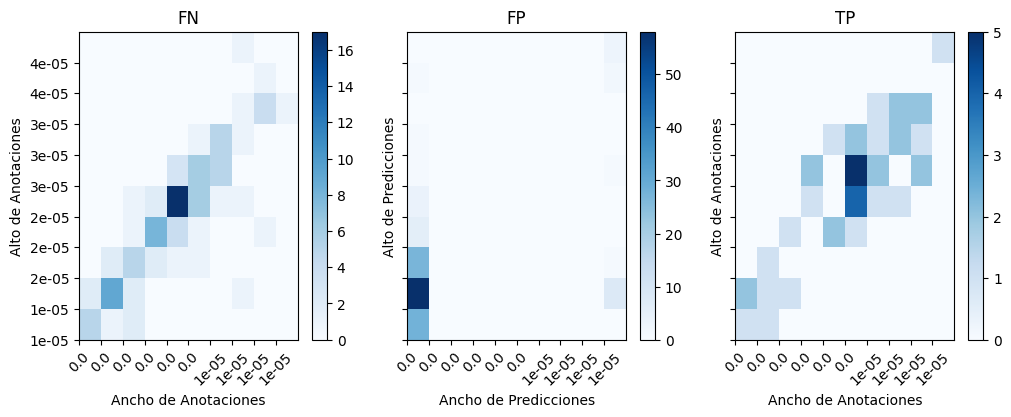

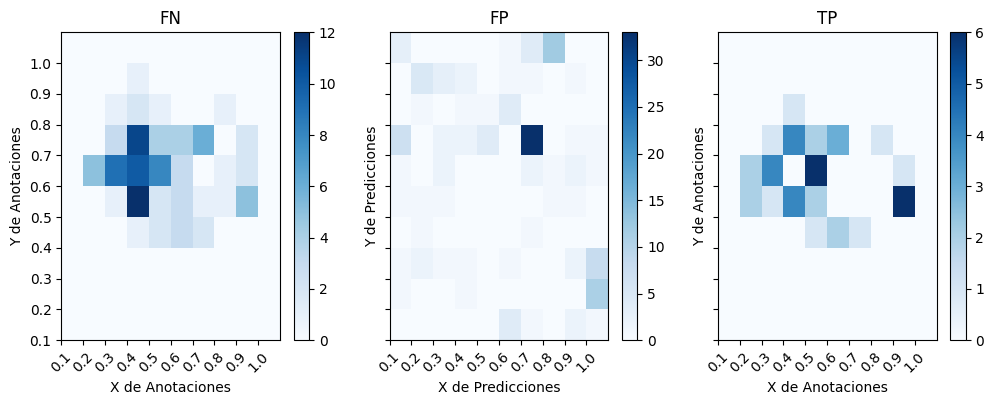

In [9]:
# ENTRENAMIENTO EN LOTE
# RESULTADOS EN training_results_dir


# definir escenarios a entrenar

epochs = 2 # bajo para probar pipeline, usar al menos 15
real_data_yaml_file = test02_dir + "data.yaml"

scenarios_to_train = {}


scenarios_to_train["COCO_v1_1_pelota"] = {
    'input_images_folder': coco_dir,
    'input_overlay_dir': overlay_images_v1_dir,
    'number_of_images_to_overlay': 1,
    'epochs': epochs,
    'imgsz': 640
}

scenarios_to_train["COCO_v1_5_pelotas"] = {
    'input_images_folder': coco_dir,
    'input_overlay_dir': overlay_images_v1_dir,
    'number_of_images_to_overlay': 5,
    'epochs': epochs,
    'imgsz': 640
}

scenarios_to_train["COCO_v2_1_pelota"] = {
    'input_images_folder': coco_dir,
    'input_overlay_dir': overlay_images_v2_dir,
    'number_of_images_to_overlay': 1,
    'epochs': epochs,
    'imgsz': 640
}

scenarios_to_train["COCO_v2_5_pelotas"] = {
    'input_images_folder': coco_dir,
    'input_overlay_dir': overlay_images_v2_dir,
    'number_of_images_to_overlay': 5,
    'epochs': epochs,
    'imgsz': 640
}

scenarios_to_train["CANCHA_v1_1_pelota"] = {
    'input_images_folder': solo_pelota_augented_dir,
    'input_overlay_dir': overlay_images_v1_dir,
    'number_of_images_to_overlay': 1,
    'epochs': epochs,
    'imgsz': 640
}

scenarios_to_train["CANCHA_v1_5_pelotas"] = {
    'input_images_folder': solo_pelota_augented_dir,
    'input_overlay_dir': overlay_images_v1_dir,
    'number_of_images_to_overlay': 5,
    'epochs': epochs,
    'imgsz': 640
}

scenarios_to_train["CANCHA_v2_1_pelota"] = {
    'input_images_folder': solo_pelota_augented_dir,
    'input_overlay_dir': overlay_images_v2_dir,
    'number_of_images_to_overlay': 1,
    'epochs': epochs,
    'imgsz': 640
}

scenarios_to_train["CANCHA_v2_5_pelotas"] = {
    'input_images_folder': solo_pelota_augented_dir,
    'input_overlay_dir': overlay_images_v2_dir,
    'number_of_images_to_overlay': 5,
    'epochs': epochs,
    'imgsz': 640
}

results_by_train = functions_training.synthetic_trainings(scenarios_to_train, training_datasets_dir,training_results_dir, real_data_yaml_file=real_data_yaml_file)

print("resultados en " + training_results_dir)

In [10]:
results_by_train

,scenario,save_dir,train_features_number,val_features_number,start_time,end_time,train_time,precision,recall,map50,...,rdv_precision,rdv_recall,rdv_map50,rdv_map50_95,rdv_cm,rdt_precision,rdt_recall,rdt_map50,rdt_map50_95,rdt_cm
0,COCO_v1_1_pelota,runs/detect/COCO_v1_1_pelota,210,30,2024-06-20 11:52:59.903055,2024-06-20 11:57:34.919008,0 days 00:04:35.015953,0.319661,0.566667,0.489040,...,0.004378,0.033113,0.000411,0.000163,"[ 17, 4041, 134, 0]",0.000382,0.040541,0.000088,0.000020,"[ 3, 757, 71, 0]"
1,COCO_v1_5_pelotas,runs/detect/COCO_v1_5_pelotas,210,30,2024-06-20 11:57:34.925516,2024-06-20 12:00:47.635049,0 days 00:03:12.709533,0.965517,0.717949,0.951223,...,0.024487,0.079470,0.024071,0.012401,"[ 31, 4373, 120, 0]",0.004805,0.027027,0.000663,0.000219,"[ 7, 957, 67, 0]"
2,COCO_v2_1_pelota,runs/detect/COCO_v2_1_pelota,210,30,2024-06-20 12:00:47.643897,2024-06-20 12:04:46.665701,0 days 00:03:59.021804,0.221221,0.633333,0.611671,...,0.053539,0.066225,0.009929,0.004222,"[ 32, 5947, 119, 0]",0.005977,0.013514,0.000653,0.000318,"[ 8, 1412, 66, 0]"
3,COCO_v2_5_pelotas,runs/detect/COCO_v2_5_pelotas,210,30,2024-06-20 12:04:46.673320,2024-06-20 12:08:56.502389,0 days 00:04:09.829069,0.915254,0.724832,0.868263,...,0.021467,0.099338,0.024412,0.011617,"[ 35, 6415, 116, 0]",0.006622,0.027027,0.005835,0.001285,"[ 12, 2167, 62, 0]"
4,CANCHA_v1_1_pelota,runs/detect/CANCHA_v1_1_pelota,677,98,2024-06-20 12:08:56.508291,2024-06-20 12:10:51.250411,0 days 00:01:54.742120,0.805226,0.717172,0.700292,...,0.016041,0.019868,0.007683,0.002828,"[ 3, 5, 148, 0]",0.046839,0.054054,0.023455,0.008181,"[ 4, 0, 70, 0]"
5,CANCHA_v1_5_pelotas,runs/detect/CANCHA_v1_5_pelotas,676,97,2024-06-20 12:10:51.256310,2024-06-20 12:12:53.080740,0 days 00:02:01.824430,0.951039,0.949153,0.967241,...,0.499220,0.324503,0.313816,0.117835,"[ 63, 86, 88, 0]",0.350883,0.135135,0.152510,0.042111,"[ 18, 26, 56, 0]"
6,CANCHA_v2_1_pelota,runs/detect/CANCHA_v2_1_pelota,677,98,2024-06-20 12:12:53.086898,2024-06-20 12:15:13.092823,0 days 00:02:20.005925,0.192283,0.765306,0.174508,...,0.015788,0.105960,0.007009,0.002736,"[ 34, 584, 117, 0]",0.012112,0.094595,0.004486,0.001594,"[ 11, 190, 63, 0]"
7,CANCHA_v2_5_pelotas,runs/detect/CANCHA_v2_5_pelotas,677,98,2024-06-20 12:15:13.098675,2024-06-20 12:17:15.491437,0 days 00:02:02.392762,0.914131,0.869036,0.884523,...,0.441073,0.238411,0.253538,0.109868,"[ 56, 72, 95, 0]",0.293702,0.162162,0.152159,0.058138,"[ 22, 30, 52, 0]"
